In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy

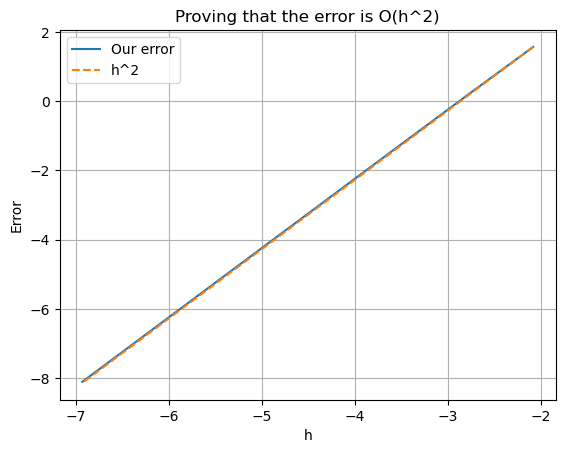

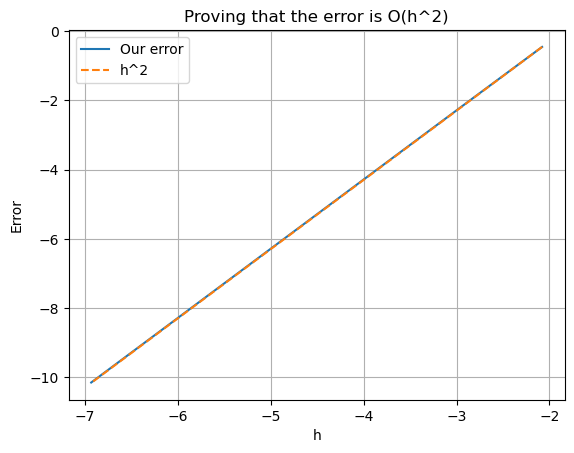

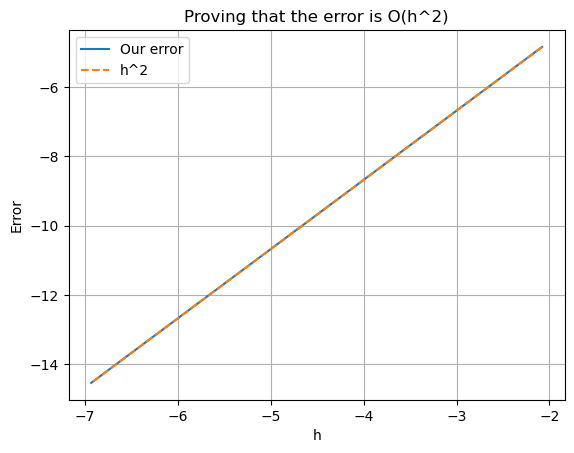

In [12]:
Nvec = np.linspace(3,10,7).astype(int)
Nvec = 2**Nvec
errorvec=[[],[],[]]
hvec = 1/Nvec

for N in Nvec:
    first_row = np.zeros(N)
    first_row[:2] = [-2, 1]
    T = la.toeplitz(first_row)
    T[N-1,N-2] = 2
    T = T/((1/N)**2)

    eig = np.array(scipy.linalg.eigvals(T))
    eig = np.sort(eig)
    caleig = eig[-3:]
    trueeig = [-(math.pi*5/2)**2, -(math.pi*3/2)**2,-(math.pi*1/2)**2 ]

    for i in range(len(errorvec)):
         errorvec[i].append(np.abs(caleig[i]-trueeig[i]))

for i in range(3):
    plt.plot(np.log(hvec), np.log(errorvec[i]))
    plt.plot(np.log(hvec), 2*np.log(hvec) + np.log(errorvec[i][0])-2*np.log(hvec[0]), '--')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.legend(['Our error', 'h^2'])
    plt.title('Proving that the error is O(h^2)')
    plt.grid()
    plt.show()



[ 0.03371459  0.06663893  0.09800132  0.12706664  0.15315362  0.17565081
  0.1940309   0.20786306  0.2168231   0.22070098  0.21940582  0.21296797
  0.20153833  0.18538481  0.16488602  0.14052245  0.11286515  0.08256238
  0.05032442  0.0169069  -0.0169069  -0.05032442 -0.08256238 -0.11286515
 -0.14052245 -0.16488602 -0.18538481 -0.20153833 -0.21296797 -0.21940582
 -0.22070098 -0.2168231  -0.20786306 -0.1940309  -0.17565081 -0.15315362
 -0.12706664 -0.09800132 -0.06663893 -0.03371459]


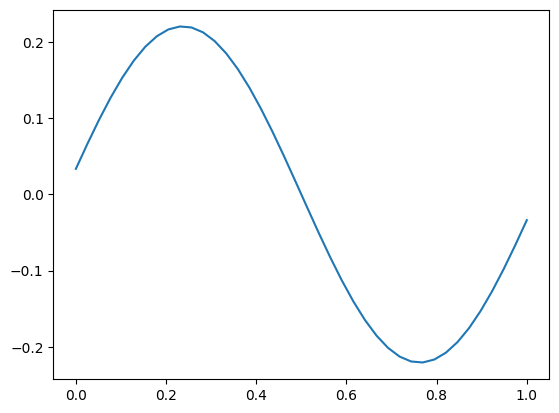

In [30]:
N = 40
Xgrid = np.linspace(0,1,N)
T = np.eye(N)*(-2.0) 
for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
    T[i+1,i] = 1.0
    T[i, i+1] = 1.0
# T[N-1,N-1] = 3/2
# T[N-1,N-3] = 1/2
#T[N-1,N-2] = 2
h = (1/N)
T = T/(h**2)
#print(scipy.linalg.eig(T))

eigvals, eigvectors = scipy.linalg.eig(T)
#print(eig)
# eigvals = eig[0][0]
# print(eigvals)
# eigenvector = np.abs(eig[1][0])
# eigenvector = np.insert(eigenvector, 0, 0)
# eigenvector = np.append(eigenvector,0)
# plt.plot(Xgrid, eigenvector)
# for eigenvector in eigvectors:
#     eigenvector = np.insert(eigenvector, 0, 0)
#     eigenvector = np.insert(eigenvector,0,0)
#     plt.plot(Xgrid, np.abs(eigenvector))
#     plt.show()
#eig_dict = {eigvals[i]: np.insert(eigvectors[i],0,0) for i in range(len(eigvals))}
#eigvals = eigvals[eigvals <= 0]
#eigvals = np.sort(eigvals)[::-1]
#print(eigvals)
print(eigvectors[:,1])
plt.plot(Xgrid,eigvectors[:,1])
#print("De första 4 egenvärdena är: " + str(eigvals[-3:]))
#for i in range(50):  
    #plt.plot(Xgrid, (eig_dict[eigvals[i]]))
    #plt.plot(Xgrid, np.sin(math.pi*(i+1)/2*Xgrid))
    #print('This belongs to value' + str(eigvals[-i]))
    #plt.show()
#print(eigvals[-1])